# Not finished - do not use

Circuit:

<img src="Circuit_Lab5.png">

In [20]:
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
l3_ft = 25.
ft_to_m = 0.3048
l3_m = l3_ft * ft_to_m

In [29]:
def wavelength_m(freq_Hz):
    return 2e8/freq_Hz
    
wavelength_m_vec = np.vectorize(wavelength_m)

def gamma_L(Z0, ZL):
    if ZL == 0:
        return 1.0
    elif ZL == 'infinite' or ZL == 'open':
        return -1.0
    else:
        return (ZL - Z0)/(ZL + Z0)

def gamma_in(Z0, ZL, l_m, wavelength_m):
    gamma_load = gamma_L(Z0, ZL)
    beta = 2*cmath.pi/wavelength_m
    temp = gamma_load * cmath.exp(-1j * 2 * beta * l_m)
    return temp

def input_impedance(Z0, ZL, l_m, wavelength_m):
    temp = gamma_in(Z0, ZL, l_m, wavelength_m)
    return Z0 * (1 + temp) / (1 - temp)
    
def z_parallel(Z1, Z2):
    return Z1*Z2 / (Z1 + Z2)

def z_total(Z0, ZL, l1_m, l2_m, l3_m, wavelength_m):
    z1 = input_impedance(z0, ZL, l1_m, w)
    z2 = input_impedance(z0, 'infinite', l2_m, w)
    ztemp = z_parallel(z1, z2)
    z3 = input_impedance(z0, ztemp, l3_m, w)
    return z3

def do_calcs_for_line(d, key):
    d[key]['gamma_L'] = gamma_L(d[key]['Z0'], d[key]['Z_Load'])
    d[key]['gamma_in'] = gamma_in(d[key]['Z0'], d[key]['Z_Load'], 
                                  d[key]['length_m'], 
                                  d['wavelength_m'] )
    d[key]['Z_in'] = input_impedance(d[key]['Z0'], d[key]['Z_Load'], 
                                  d[key]['length_m'], 
                                  d['wavelength_m'] )


def do_calcs(d):
    do_calcs_for_line(d, 'line1')
    do_calcs_for_line(d, 'line2')
    d['line3']['Z_Load'] = z_parallel(d['line1']['Z_in'], d['line2']['Z_in'])
    do_calcs_for_line(d, 'line3')


def do_calcs_old(d):
    for key in ['line1', 'line2']:
        d[key]['gamma_L'] = gamma_L(d[key]['Z0'], d[key]['Z_Load'])
        d[key]['gamma_in'] = gamma_in(d[key]['Z0'], d[key]['Z_Load'], 
                                      d[key]['length_m'], 
                                      d['wavelength_m'] )
        d[key]['Z_in'] = input_impedance(d[key]['Z0'], d[key]['Z_Load'], 
                                      d[key]['length_m'], 
                                      d['wavelength_m'] )
    d['line3']['Z_Load'] = z_parallel(d['line1']['Z_in'], d['line2']['Z_in'])
    d['line3']['gamma_L'] = gamma_L(d['line3']['Z0'], d['line3']['Z_Load'])
    d['line3']['gamma_in'] = gamma_in(d['line3']['Z0'], d['line3']['Z_Load'], 
                                  d['line3']['length_m'], 
                                  d['wavelength_m'] )
    d['line3']['Z_in'] = input_impedance(d['line3']['Z0'], d['line3']['Z_Load'], 
                                  d['line3']['length_m'], 
                                  d['wavelength_m'] )
    

In [32]:
test_dict = {
    'frequency_Hz':0.1e6,
    'wavelength_m':2000.0,
    'line1':{
        'Z0':50.,
        'Z_Load':50.,
        'length_m':1.0,
    },
    'line2':{
        'Z0':50.,
        'Z_Load':'infinite',
        'length_m':1.0,
    },
    'line3':{
        'Z0':50.,
        'Z_Load':'infinite',
        'length_m':l3_m,
    },
}

In [31]:
do_calcs(test_dict)
test_dict

{'frequency_Hz': 100000.0,
 'line1': {'Z0': 50.0,
  'Z_Load': 50.0,
  'Z_in': (50+0j),
  'gamma_L': 0.0,
  'gamma_in': 0j,
  'length_m': 1.0},
 'line2': {'Z0': 50.0,
  'Z_Load': 'infinite',
  'Z_in': (3.628824671308984e-16+0.15708014945280785j),
  'gamma_L': -1.0,
  'gamma_in': (-0.9999802608561371+0.006283143965558951j),
  'length_m': 1.0},
 'line3': {'Z0': 50.0,
  'Z_Load': (0.000493478596572117+0.15707859913897385j),
  'Z_in': (0.0004938357938617905+1.3543559733012107j),
  'gamma_L': (-0.999960522881141+0.0062829579352431005j),
  'gamma_in': (-0.9985139419847631+0.054133451240338915j),
  'length_m': 7.62},
 'wavelength_m': 2000.0}

In [33]:
do_calcs_old(test_dict)
test_dict

{'frequency_Hz': 100000.0,
 'line1': {'Z0': 50.0,
  'Z_Load': 50.0,
  'Z_in': (50+0j),
  'gamma_L': 0.0,
  'gamma_in': 0j,
  'length_m': 1.0},
 'line2': {'Z0': 50.0,
  'Z_Load': 'infinite',
  'Z_in': (3.628824671308984e-16+0.15708014945280785j),
  'gamma_L': -1.0,
  'gamma_in': (-0.9999802608561371+0.006283143965558951j),
  'length_m': 1.0},
 'line3': {'Z0': 50.0,
  'Z_Load': (0.000493478596572117+0.15707859913897385j),
  'Z_in': (0.0004938357938617905+1.3543559733012107j),
  'gamma_L': (-0.999960522881141+0.0062829579352431005j),
  'gamma_in': (-0.9985139419847631+0.054133451240338915j),
  'length_m': 7.62},
 'wavelength_m': 2000.0}

In [5]:
zL_temp = [0, 25, 50, 100, 'infinite']
z0 = 50

for zL in zL_temp:
    #print(zL)
    print('Length (m): {:4},       Reflection coefficient: {:5.3f}'.format(zL, gamma_L(z0, zL)))

Length (m):    0,       Reflection coefficient: 1.000
Length (m):   25,       Reflection coefficient: -0.333
Length (m):   50,       Reflection coefficient: 0.000
Length (m):  100,       Reflection coefficient: 0.333
Length (m): infinite,       Reflection coefficient: -1.000


In [6]:
lengths_m = [0, 0.125, 0.25, 0.375, 0.5, 0.75, 1.0]
wavelength_m = 1.0

print('length (m)  gamma_in.real  gamma_in.imag  z.real  z.imag')
for l_m in lengths_m:
    temp_gamma = gamma_in(z0, 'infinite', l_m, wavelength_m)
    temp_z = input_impedance(z0, 'infinite', l_m, wavelength_m)
    print('{:5.2f}       {:5.2f}          {:5.2e}       {:5.2f}   {:5.2f}'.format(l_m, temp_gamma.real, temp_gamma.imag, temp_z.real, temp_z.imag))

length (m)  gamma_in.real  gamma_in.imag  z.real  z.imag
 0.00       -1.00          0.00e+00        0.00    0.00
 0.12       -0.00          1.00e+00       -0.00   50.00
 0.25        1.00          1.22e-16       -50.00   816561967659768448.00
 0.38        0.00          -1.00e+00        0.00   -50.00
 0.50       -1.00          -2.45e-16       -0.00   -0.00
 0.75        1.00          3.67e-16       -50.00   272187322553256160.00
 1.00       -1.00          -4.90e-16       -0.00   -0.00


In [7]:
(1 + 1j) / (1 - 1j)

1j

In [8]:
velocity_mpers = 2e8
frequencies = [0.1e6, 5e6, 20e6]
wavelengths = [velocity_mpers/f for f in frequencies]
wavelengths

[2000.0, 40.0, 10.0]

In [9]:
l1_m = 1
l2_m = 1
l3_m = 25 * 0.3048

print('  f (Hz)    lambda (m)      z1               z2              ztemp             zfinal')
for i,w in enumerate(wavelengths):
    z1 = input_impedance(z0, 50, l1_m, w)
    z2 = input_impedance(z0, 'infinite', l2_m, w)
    ztemp = z_parallel(z1, z2)
    z3 = input_impedance(z0, ztemp, l3_m, w)
    print('{:10.1f}   {:6.1f}     {:5.3}    {:5.3}    {:5.3}        {:5.3}'.format(frequencies[i], w, z1, z2, ztemp, z3))

  f (Hz)    lambda (m)      z1               z2              ztemp             zfinal
  100000.0   2000.0     (50+0j)    (3.63e-16+0.157j)    (0.000493+0.157j)        (0.000494+1.35j)
 5000000.0     40.0     (50+0j)    (1.33e-15+7.92j)    (1.22+7.73j)        (24.7+220j)
20000000.0     10.0     (50+0j)    (3.55e-15+36.3j)    (17.3+23.8j)        (41.1-61.7j)


In [10]:
def z_total(Z0, ZL, l1_m, l2_m, l3_m, wavelength_m):
    z1 = input_impedance(z0, ZL, l1_m, w)
    z2 = input_impedance(z0, 'infinite', l2_m, w)
    ztemp = z_parallel(z1, z2)
    z3 = input_impedance(z0, ztemp, l3_m, w)
    return z3

In [11]:
l1_m = 1
l2_m = 1
l3_m = 25 * 0.3048
z_load = 50
for i,w in enumerate(wavelengths):
    z3 = z_total(z0, z_load, l1_m, l2_m, l3_m, w)
    print('{:10.1f}   {:6.1f}     {:5.3}'.format(frequencies[i], w, z3))

  100000.0   2000.0     (0.000494+1.35j)
 5000000.0     40.0     (24.7+220j)
20000000.0     10.0     (41.1-61.7j)


In [22]:
l1_m = 1
l2_m = 1
l3_m = 25 * 0.3048
z0 = 50.
z_load = 50.

n_pnts = 10
f_start = 1e5
f_end = 20e6
#frequencies = np.linspace(f_start, f_end, n_pnts)
frequencies = [0.1e6, 5e6, 20e6]
wavelengths = [velocity_mpers/f for f in frequencies]
print(wavelengths)
wavelengths = wavelength_m_vec(frequencies)
print(wavelengths, '\n')
z_tot = []
for i,w in enumerate(wavelengths):
    z_tot.append( z_total(z0, z_load, l1_m, l2_m, l3_m, w) )
    #print('{:10.1f}   {:6.1f}     {:5.3}'.format(frequencies[i], w, z3))
#z_tot = z_total_vec(z0, z_load, l1_m, l2_m, l3_m, wavelengths)

print('\n',frequencies)
print(wavelengths)
z_tot

[2000.0, 40.0, 10.0]
[ 2000.    40.    10.] 


 [100000.0, 5000000.0, 20000000.0]
[ 2000.    40.    10.]


[(0.0004938357938617905+1.3543559733012107j),
 (24.70812902795613+220.47198163151396j),
 (41.067188164057185-61.72637012249001j)]

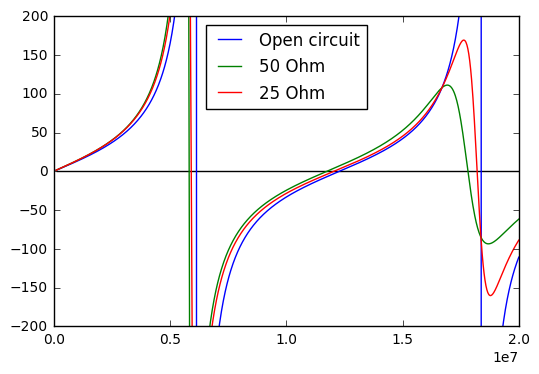

In [43]:
l1_m = 1
l2_m = 1
l3_m = 25 * 0.3048
z0 = 50.
z_load = 50.

n_pnts = 1000
f_start = 1e5
f_end = 20e6
frequencies = np.linspace(f_start, f_end, n_pnts)
wavelengths = wavelength_m_vec(frequencies)
z_tot_open = []
z_tot_50 = []
z_tot_25 = []
for i,w in enumerate(wavelengths):
    z_tot_open.append( z_total(z0, 'infinite', l1_m, l2_m, l3_m, w) )
    z_tot_50.append( z_total(z0, 50., l1_m, l2_m, l3_m, w) )
    z_tot_25.append( z_total(z0, 25., l1_m, l2_m, l3_m, w) )
z_tot_open = np.array(z_tot_open)
z_tot_50 = np.array(z_tot_50)
z_tot_25 = np.array(z_tot_25)

fig, ax = plt.subplots()
ax.plot(frequencies, z_tot_open.imag, label='Open circuit')
ax.plot(frequencies, z_tot_50.imag, label='50 Ohm')
ax.plot(frequencies, z_tot_25.imag, label='25 Ohm')
ax.hlines(0, xmin=min(frequencies), xmax=max(frequencies))
ax.set_ylim(-200,200)
ax.legend(loc='upper center')


In [44]:
frequencies = [0.1e6, 5e6, 20e6]
wavelengths = wavelength_m_vec(frequencies)
z_tot_open = []
z_tot_50 = []
z_tot_25 = []
for i,w in enumerate(wavelengths):
    z_tot_open.append( z_total(z0, 'infinite', l1_m, l2_m, l3_m, w) )
    z_tot_50.append( z_total(z0, 50., l1_m, l2_m, l3_m, w) )
    z_tot_25.append( z_total(z0, 25., l1_m, l2_m, l3_m, w) )
z_tot_open = np.array(z_tot_open)
z_tot_50 = np.array(z_tot_50)
z_tot_25 = np.array(z_tot_25)

In [45]:
z_tot_25

array([  9.87554619e-04  +1.35434667j,   3.31323371e+01+202.07764151j,
         3.67472148e+01 -88.85366673j])

In [46]:
z_tot_50

array([  4.93835794e-04  +1.35435597j,   2.47081290e+01+220.47198163j,
         4.10671882e+01 -61.72637012j])

In [47]:
z_tot_open

array([ -4.64905892e-16  +1.27576356j,  -2.92479475e-14+164.65130682j,
         0.00000000e+00-110.81698321j])